## About Datasets
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
## Features
#### Age
Age

#### Anaemia
Decrease of red blood cells or hemoglobin (0 = No, 1 = Yes)

#### Creatinine_phosphokinase
Level of the CPK enzyme in the blood (mcg/L)

#### Diabetes
If the patient has diabetes (0 = No, 1 = Yes)

#### Rejection_fraction
Percentage of blood leaving the heart at each contraction (percentage)

#### High_blood_pressure
If the patient has hypertension (boolean)

#### platelets
Platelets in the blood (kiloplatelets/mL)

#### serum_creatinine
Level of serum creatinine in the blood (mg/dL)

#### serum_sodium
Level of serum sodium in the blood (mEq/L)

#### sex
Woman or man  (Male = 1, Female =0)
#### Smoking
If the patient smokes or not (boolean)

#### Time
Follow-up period (days)

#### DEATH_EVENT(Target Variable)
If the patient deceased during the follow-up period (0 = No, 1 = Yes)

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from data_prep import * 
from eda import *


data_prep and eda are the Python scripts I have prepared to avoid rewriting the same functions over and over. These files will also be shared. 

In [2]:
#Lets take a look our dataset
df=pd.read_csv("../Datasets/heart_failure_clinical_records_dataset.csv")
df.rename(columns = {'ejection_fraction':'rejection_fraction'}, inplace = True)
check_df(df)

##################### Shape #####################
(299, 13)
##################### Types #####################
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
rejection_fraction            int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
##################### Head #####################
    age  anaemia  creatinine_phosphokinase  diabetes  rejection_fraction  \
0  75.0        0                       582         0                  20   
1  55.0        0                      7861         0                  38   
2  65.0        0                       146         0                  20   
3  50.0        1                       111         0   

It looks like there are outliers in some variables. We'll find out for sure after testing for outliers

In [3]:
#Lets obtain categorical and numerical variables.
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Observations: 299
Variables: 13
cat_cols: 6
num_cols: 7
cat_but_car: 0
num_but_cat: 6


In [4]:
#Lets look at these variables
print("***Categorical Variables***")
for col in cat_cols:
    print(col)
print("***Numerical Variables***")
for col in num_cols:
    print(col)

***Categorical Variables***
anaemia
diabetes
high_blood_pressure
sex
smoking
DEATH_EVENT
***Numerical Variables***
age
creatinine_phosphokinase
rejection_fraction
platelets
serum_creatinine
serum_sodium
time


In [5]:
#Lets check outliers in num_cols
for col in num_cols:
    print(col,check_outlier(df,col,q1=0.05,q3=0.95))

age False
creatinine_phosphokinase True
rejection_fraction False
platelets False
serum_creatinine True
serum_sodium False
time False


As we thought there are outliers in creatinine_phosphokinase and serum_creatinine

In [6]:
#Lets analyze numeric variables
for col in num_cols:
    print("******** {} *********".format(col.upper()))
    num_summary(df,col)

******** AGE *********
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
5%        42.900000
10%       45.000000
20%       50.000000
30%       53.000000
40%       58.000000
50%       60.000000
60%       63.000000
70%       65.000000
80%       70.000000
90%       75.400000
95%       82.000000
99%       90.080000
max       95.000000
Name: age, dtype: float64

******** CREATININE_PHOSPHOKINASE *********
count     299.000000
mean      581.839465
std       970.287881
min        23.000000
5%         59.000000
10%        67.600000
20%       100.200000
30%       130.400000
40%       176.800000
50%       250.000000
60%       425.200000
70%       582.000000
80%       620.400000
90%      1203.800000
95%      2263.000000
99%      5222.460000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

******** REJECTION_FRACTION *********
count    299.000000
mean      38.083612
std       11.834841
min       14.000000
5%        20.000000
10%       25.000000
20%

   anaemia      Ratio
0      170  56.856187
1      129  43.143813
##########################################


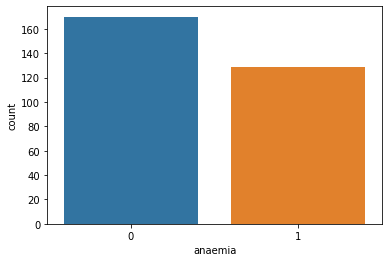

   diabetes     Ratio
0       174  58.19398
1       125  41.80602
##########################################


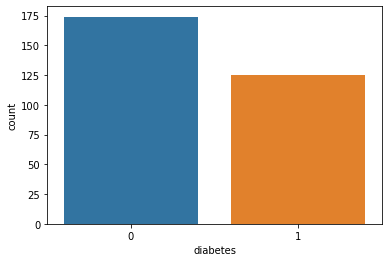

   high_blood_pressure      Ratio
0                  194  64.882943
1                  105  35.117057
##########################################


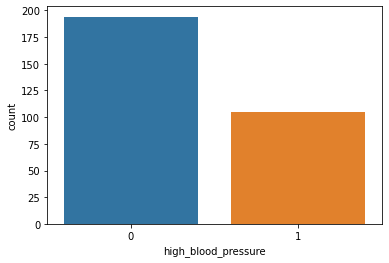

   sex      Ratio
1  194  64.882943
0  105  35.117057
##########################################


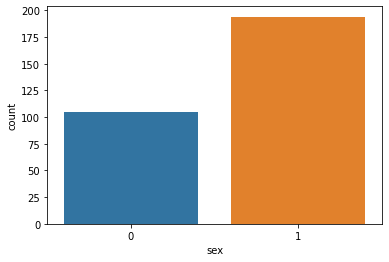

   smoking      Ratio
0      203  67.892977
1       96  32.107023
##########################################


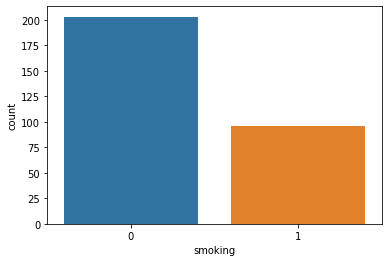

   DEATH_EVENT      Ratio
0          203  67.892977
1           96  32.107023
##########################################


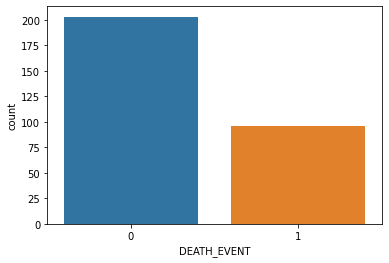

In [7]:
#lets analyze categorical variables
for col in cat_cols:
    cat_summary(df,col,plot=True)

In [8]:
#Lets check what is the percantage of death for each categorical variable.
for col in cat_cols:
    percantage_of_death=df.groupby(col).agg({"DEATH_EVENT":["sum","count",lambda death:(death.sum()/death.count())*100]})
    percantage_of_death.columns=["Total_Death","Total_Person","Percantage(%)"]
    print(percantage_of_death)

         Total_Death  Total_Person  Percantage(%)
anaemia                                          
0                 50           170      29.411765
1                 46           129      35.658915
          Total_Death  Total_Person  Percantage(%)
diabetes                                          
0                  56           174      32.183908
1                  40           125      32.000000
                     Total_Death  Total_Person  Percantage(%)
high_blood_pressure                                          
0                             57           194      29.381443
1                             39           105      37.142857
     Total_Death  Total_Person  Percantage(%)
sex                                          
0             34           105      32.380952
1             62           194      31.958763
         Total_Death  Total_Person  Percantage(%)
smoking                                          
0                 66           203      32.512315
1             

it can be seen that high_blood_pressure and anaemia has higher impact on death event.

In [9]:
#Lets chechk average value of numerical cols for death event
for col in num_cols:
    num_cols_avg=df.groupby("DEATH_EVENT").agg({col:"mean"})
    num_cols_avg.columns=["Average of {}".format(col.upper())]
    print(num_cols_avg)

             Average of AGE
DEATH_EVENT                
0                 58.761906
1                 65.215281
             Average of CREATININE_PHOSPHOKINASE
DEATH_EVENT                                     
0                                     540.054187
1                                     670.197917
             Average of REJECTION_FRACTION
DEATH_EVENT                               
0                                 40.26601
1                                 33.46875
             Average of PLATELETS
DEATH_EVENT                      
0                   266657.489901
1                   256381.044792
             Average of SERUM_CREATININE
DEATH_EVENT                             
0                               1.184877
1                               1.835833
             Average of SERUM_SODIUM
DEATH_EVENT                         
0                         137.216749
1                         135.375000
             Average of TIME
DEATH_EVENT                 
0             

It is obvious that some variables like TIME, REJECTION_FRACTION has high impact on target variable

### Base Model

In [10]:
binary_cols=[col for col in cat_cols if df[col].nunique()<=2]
for col in binary_cols:
    print(col,df[col].unique())

anaemia [0 1]
diabetes [0 1]
high_blood_pressure [1 0]
sex [1 0]
smoking [0 1]
DEATH_EVENT [1 0]


 All the categorical variables we have are binary and they are 1,0 form so we do not need to encode them

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
df_=df.copy()
X=df_.drop("DEATH_EVENT",axis=1)
y=df_["DEATH_EVENT"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=17)
base_model=RandomForestClassifier(random_state=17)
base_model.fit(X_train,y_train)
y_pred=base_model.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 3)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")


Accuracy: 0.83
Recall: 0.643
Precision: 0.64
F1: 0.64
Auc: 0.77


## Feature Engineering 

In [14]:
# People between 40-60 are middle age. People between 60-80 are old. People older than 80 are too old.
df.loc[(df["age"]>=40) & (df["age"]<60),"Age_Category"]="Middle Age"
df.loc[(df["age"]>=60) & (df["age"]<80),"Age_Category"]="Old"
df.loc[(df["age"]>=80),"Age_Category"]="Too_Old"
Age_Cat_Sum=df.groupby("Age_Category").agg({"DEATH_EVENT":["sum","count",lambda death:(death.sum()/death.count())*100]})
Age_Cat_Sum.columns=["Total_Death","Total_Person","Percantage(%)"]
Age_Cat_Sum

,Total_Death,Total_Person,Percantage(%)
Age_Category,,,
Middle Age,31,129,24.031008
Old,47,145,32.413793
Too_Old,18,25,72.000000


We can see that too old person has higher percantage of death

In [15]:
#People who are old or too old and have high blood pressure are 1 others 0
def high_blood_pressure(dataframe):
    if((dataframe["high_blood_pressure"]==1) & ((dataframe["Age_Category"]=="Old")|(dataframe["Age_Category"]=="Too_Old"))):
        return 1
    else:
        return 0
df["High_Blood_Pressure_Old"]=df.apply(high_blood_pressure,axis=1)
Blood_Pressure_Age_Sum=df.groupby("High_Blood_Pressure_Old").agg({"DEATH_EVENT":["sum","count",lambda death:(death.sum()/death.count())*100]})
Blood_Pressure_Age_Sum.columns=["Total_Death","Total_Person","Percantage(%)"]
Blood_Pressure_Age_Sum
        
    

,Total_Death,Total_Person,Percantage(%)
High_Blood_Pressure_Old,,,
0,70,234,29.91453
1,26,65,40.00000


In [16]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Observations: 299
Variables: 15
cat_cols: 8
num_cols: 7
cat_but_car: 0
num_but_cat: 7


In [17]:
#Lets replace outliers with tresh-holds and check are there still outliers
for col in num_cols:
    replace_with_thresholds(df,col,q1=0.05,q3=0.95)
for col in num_cols:
    print(col,check_outlier(df,col,q1=0.05,q3=0.95))

age False
creatinine_phosphokinase False
rejection_fraction False
platelets False
serum_creatinine False
serum_sodium False
time False


In [18]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
for col in num_cols:
    df[col]=scaler.fit_transform(df[[col]])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,rejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_Category,High_Blood_Pressure_Old
0,0.789474,0,0.713212,0,-1.2,1,0.032967,1.6,-1.166667,1,0,-0.853846,1,Old,1
1,-0.263158,0,11.426423,0,0.0,0,0.014923,0.0,-0.166667,1,0,-0.838462,1,Middle Age,0
2,0.263158,0,-0.223416,0,-1.2,0,-1.098901,0.4,-1.333333,1,1,-0.830769,1,Old,0
3,-0.526316,1,-0.298604,0,-1.2,0,-0.571429,1.6,0.000000,1,0,-0.830769,1,Middle Age,0
4,0.263158,1,-0.193340,1,-1.2,0,0.714286,3.2,-3.500000,0,0,-0.823077,1,Old,0


In [19]:
cat_cols.remove("DEATH_EVENT")
df=one_hot_encoder(df,cat_cols,drop_first=True)
df

,age,creatinine_phosphokinase,rejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,Age_Category_Old,Age_Category_Too_Old,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1,High_Blood_Pressure_Old_1
0,0.789474,0.713212,-1.200000,0.032967,1.6,-1.166667,-0.853846,1,1,0,0,0,1,1,0,1
1,-0.263158,11.426423,0.000000,0.014923,0.0,-0.166667,-0.838462,1,0,0,0,0,0,1,0,0
2,0.263158,-0.223416,-1.200000,-1.098901,0.4,-1.333333,-0.830769,1,1,0,0,0,0,1,1,0
3,-0.526316,-0.298604,-1.200000,-0.571429,1.6,0.000000,-0.830769,1,0,0,1,0,0,1,0,0
4,0.263158,-0.193340,-1.200000,0.714286,3.2,-3.500000,-0.823077,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.105263,-0.406015,0.000000,-1.175824,0.0,1.000000,1.192308,0,1,0,0,1,1,1,1,1
295,-0.263158,3.372718,0.000000,0.087912,0.2,0.333333,1.200000,0,0,0,0,0,0,0,0,0
296,-0.789474,3.888292,1.466667,5.274725,-0.6,0.166667,1.253846,0,0,0,0,1,0,0,0,0
297,-0.789474,4.646617,0.000000,-1.340659,0.6,0.500000,1.269231,0,0,0,0,0,0,1,1,0


## Model Selection

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
X=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)
models=[("RF",RandomForestClassifier(random_state=17)),
      ( "GB",GradientBoostingClassifier()),
       ("DT",DecisionTreeClassifier()),
      ( "LG",LogisticRegression()),
      ( "KNC",KNeighborsClassifier()),
       ("CBC",CatBoostClassifier(verbose=False)),
       ("LGBM",LGBMClassifier()),
       ("XGB",XGBClassifier())]
for name, model in models:
    print(f"******{name}*********")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
    print(f"Recall: {round(recall_score(y_pred, y_test), 3)}")
    print(f"Precision: {round(precision_score(y_pred, y_test), 2)}")
    print(f"F1: {round(f1_score(y_pred, y_test), 2)}")
    print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")
    
   

******RF*********
Accuracy: 0.9
Recall: 0.833
Precision: 0.71
F1: 0.77
Auc: 0.88
******GB*********
Accuracy: 0.88
Recall: 0.706
Precision: 0.86
F1: 0.77
Auc: 0.83
******DT*********
Accuracy: 0.75
Recall: 0.474
Precision: 0.64
F1: 0.55
Auc: 0.68
******LG*********
Accuracy: 0.85
Recall: 0.692
Precision: 0.64
F1: 0.67
Auc: 0.79
******KNC*********
Accuracy: 0.8
Recall: 0.6
Precision: 0.43
F1: 0.5
Auc: 0.72
******CBC*********
Accuracy: 0.85
Recall: 0.692
Precision: 0.64
F1: 0.67
Auc: 0.79
******LGBM*********
Accuracy: 0.82
Recall: 0.6
Precision: 0.64
F1: 0.62
Auc: 0.74
******XGB*********
Accuracy: 0.83
Recall: 0.625
Precision: 0.71
F1: 0.67
Auc: 0.77


### Before feature engineering and all other procceses our base model's(Random Forest) succes is:
#### Accuracy: 0.83
#### Recall: 0.643
#### Precision: 0.64
#### F1: 0.64
#### Auc: 0.77
### After feature engineering and all other processes our best model's(Random Forest) succes is:
#### Accuracy: 0.9
#### Recall: 0.833
#### Precision: 0.71
#### F1: 0.77
#### Auc: 0.88